# Dataset 

https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset

# Problem definition 

We chose a dataset combining different types of food, world population obesity and undernourished rate, and global covid cases count from around the world.

The idea is to understand how a healthy eating style could help combat the coronavirus, distinguishing the diet patterns from countries with lower COVID infection rate.

Our goal here is to provide diet recommendations based on our findings.

Each dataset provides different diet measure different categories of food, depending on what we want to focus on, so we have

- fat quantity,
- energy intake (kcal),
- food supply quantity (kg),
- protein for different categories of food

To which have been added:

- obesity rate
- undernourished rate
- the most up to date confirmed/deaths/recovered/active cases.

We are going to focus on the fat quantity dataset.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import export_graphviz, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC, SVR

Let's start by loading the data

In [2]:
fat_quantity = pd.read_csv("../data/Fat_Supply_Quantity_Data.csv")

 ## Data Exploration and Processing

Now let's explore the dataset:
- check the head
- the columns
- the variable types

In [3]:
fat_quantity.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [4]:
fat_quantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Miscellaneous                 170 non-null    float64
 11  Milk - Excluding Butter       170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

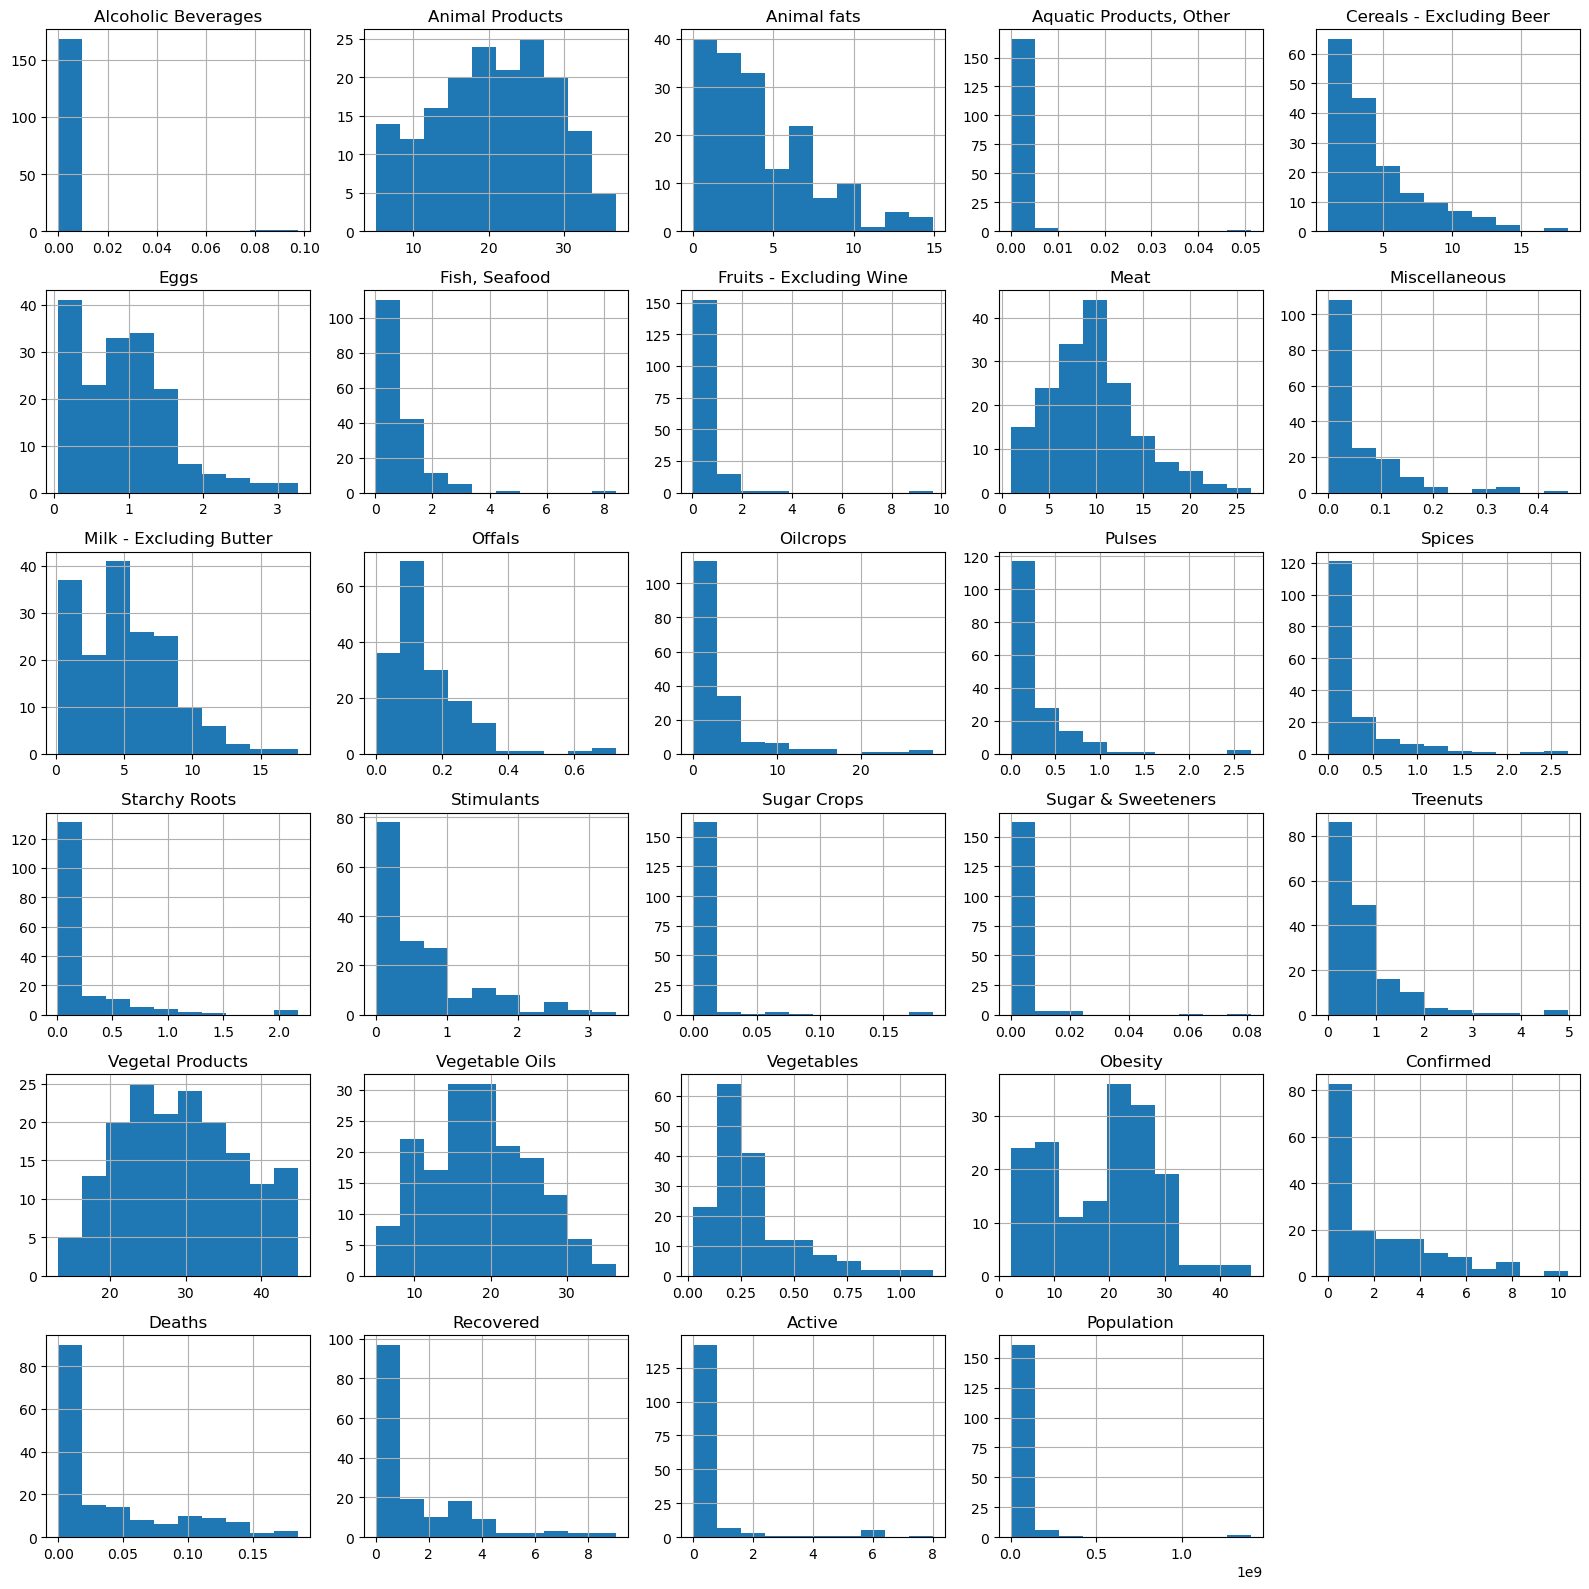

In [5]:
fat_quantity.hist(figsize=(16,16))
plt.tight_layout()
plt.show()

In [6]:
fat_quantity.describe(include='all')

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,167.000000,163,164.000000,164.000000,164.000000,162.000000,1.700000e+02,170
unique,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,NaN,1
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<2.5,NaN,NaN,NaN,NaN,NaN,%
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,44,NaN,NaN,NaN,NaN,NaN,170
mean,NaN,0.001035,20.695714,4.138451,0.000450,4.376548,0.953890,0.850437,0.542117,9.494279,...,18.571657,0.309512,18.707784,NaN,2.021972,0.039370,1.452356,0.535158,4.452364e+07,NaN
std,NaN,0.009569,8.002713,3.287462,0.004039,3.183815,0.643957,0.924103,0.838286,4.666762,...,6.766615,0.211766,9.633557,NaN,2.360454,0.048718,1.927617,1.329249,1.564182e+08,NaN
min,NaN,0.000000,5.018200,0.026200,0.000000,0.990800,0.058000,0.017400,0.037300,0.906100,...,4.954900,0.026300,2.100000,NaN,0.000312,0.000000,0.000000,0.000000,5.400000e+04,NaN
25%,NaN,0.000000,14.885800,1.674225,0.000000,1.970150,0.411350,0.330975,0.239500,6.263575,...,13.812825,0.173675,8.500000,NaN,0.140976,0.002013,0.099107,0.012028,2.816250e+06,NaN
50%,NaN,0.000000,20.943050,3.312350,0.000000,3.306750,0.898300,0.572700,0.361400,9.259000,...,18.192550,0.247450,21.200000,NaN,1.011570,0.011998,0.475402,0.081040,1.018150e+07,NaN
75%,NaN,0.000000,26.866950,6.227575,0.000000,5.587600,1.276900,1.111625,0.577800,11.750450,...,23.597300,0.362925,25.700000,NaN,3.487069,0.069503,2.622874,0.358183,3.271625e+07,NaN


Let's create a function to **check missing data** and unveil **the percentage of data missing** for each dataframe

In [26]:
def nans(X):
    return pd.DataFrame(X.apply(lambda x: round(x.isna().sum()/x.count() * 100,2))).sort_values(by=0,ascending=False)

In [27]:
nans(fat_quantity)

,0
Active,4.94
Undernourished,4.29
Deaths,3.66
Confirmed,3.66
Recovered,3.66
Obesity,1.80
Country,0.00
Alcoholic Beverages,0.00
Fruits - Excluding Wine,0.00
Meat,0.00


Delete the countries for which values are missing.

In [28]:
fat_quantity = fat_quantity.dropna()

Look at the different data types for each variable.

In [29]:
fat_quantity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       154 non-null    object 
 1   Alcoholic Beverages           154 non-null    float64
 2   Animal Products               154 non-null    float64
 3   Animal fats                   154 non-null    float64
 4   Aquatic Products, Other       154 non-null    float64
 5   Cereals - Excluding Beer      154 non-null    float64
 6   Eggs                          154 non-null    float64
 7   Fish, Seafood                 154 non-null    float64
 8   Fruits - Excluding Wine       154 non-null    float64
 9   Meat                          154 non-null    float64
 10  Miscellaneous                 154 non-null    float64
 11  Milk - Excluding Butter       154 non-null    float64
 12  Offals                        154 non-null    float64
 13  Oilcrops  

Explore the variables that are not of float type and see of you can convert them in to float type.

In [34]:
fat_quantity['Undernourished'][fat_quantity['Undernourished']=='<2.5'] = 2.4

fat_quantity['Undernourished'] = fat_quantity['Undernourished'].astype('float')

In [38]:
fat_quantity = fat_quantity.set_index('Country')

fat_quantity = fat_quantity.drop('Unit (all except Population)',axis=1)

In [39]:
fat_quantity.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,...,28.3684,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,...,17.9998,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,...,35.5857,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,...,34.7010,22.4638,0.1231,6.8,25.0,0.061687,0.001461,0.056808,0.003419,32522000.0
Argentina,0.0,30.3572,3.3076,0.0,1.3316,1.5706,0.1664,0.2091,19.2693,0.0000,...,19.6449,17.3147,0.1878,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0


# Clustering

## Data preparation

Scale the dataset

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
fat_quantity_scaled = pd.DataFrame(scaler.fit_transform(fat_quantity),columns = fat_quantity.columns,index=fat_quantity.index)

In [50]:
fat_quantity_scaled

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,0.521318,0.409939,0.0,0.405194,0.195145,0.000143,0.040196,0.204454,0.035738,...,0.478936,0.385466,0.295344,0.055300,0.479021,0.013626,0.033360,0.013648,0.001568,0.027709
Albania,0.000000,0.846266,0.220007,0.0,0.096782,0.493163,0.013492,0.062737,0.307043,0.037273,...,0.153734,0.136329,0.553437,0.465438,0.066434,0.285071,0.274778,0.198303,0.140117,0.001972
Algeria,0.000000,0.294800,0.049386,0.0,0.184792,0.360237,0.020214,0.056033,0.117149,0.096251,...,0.705300,0.712113,0.432993,0.564516,0.026224,0.023500,0.035368,0.018537,0.008824,0.031580
Angola,0.000000,0.322608,0.077538,0.0,0.320020,0.029805,0.165248,0.032329,0.396531,0.067529,...,0.677552,0.556479,0.085854,0.108295,0.395105,0.005897,0.007877,0.006284,0.000426,0.023140
Argentina,0.000000,0.794735,0.212587,0.0,0.019603,0.470102,0.016107,0.017830,0.719474,0.000000,...,0.205331,0.392827,0.143237,0.608295,0.038462,0.418513,0.583659,0.431996,0.042735,0.032307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.000000,0.354662,0.142151,0.0,0.089391,0.185697,0.064380,0.096177,0.242478,0.016882,...,0.645702,0.780779,0.140843,0.532258,0.328671,0.043455,0.023119,0.046947,0.002980,0.020376
Vietnam,0.000000,0.885414,0.247537,0.0,0.156723,0.225603,0.130168,0.038462,1.000000,0.014032,...,0.114686,0.021174,0.541907,0.000000,0.120629,0.000168,0.000196,0.000169,0.000062,0.068556
Yemen,0.000000,0.235918,0.124940,0.0,0.606040,0.153344,0.042172,0.022739,0.277980,0.056128,...,0.763882,0.593582,0.124523,0.276498,0.638112,0.000655,0.011120,0.000530,0.000035,0.021218


## Plot some data

Now, we want to visualize some variables for each state. To do so, we use plotly express to have the possibility to hover on a scatter plot and see the statistics per country clearer as explained here.

https://plotly.com/python/hover-text-and-formatting/#:~:text=Basic%20Charts%20tutorials.-,Hover%20Labels,having%20a%20hover%20label%20appear.

Plot the "Obesity" vs "Deaths" statistics

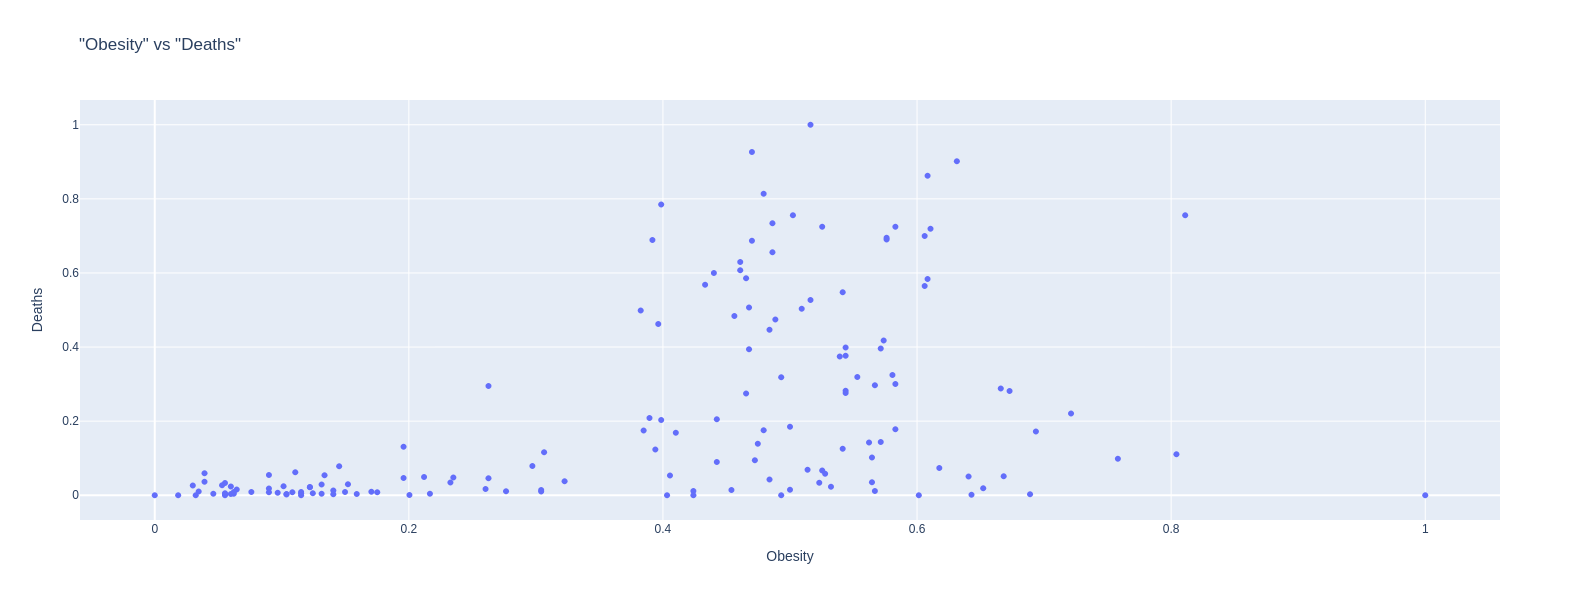

In [56]:
import plotly.express as px

fig = px.scatter(fat_quantity_scaled, x = 'Obesity', y= 'Deaths', title = '"Obesity" vs "Deaths"',width=900,height=600)
fig.show()

Plot the "Animal fats" vs "Deaths" statistics

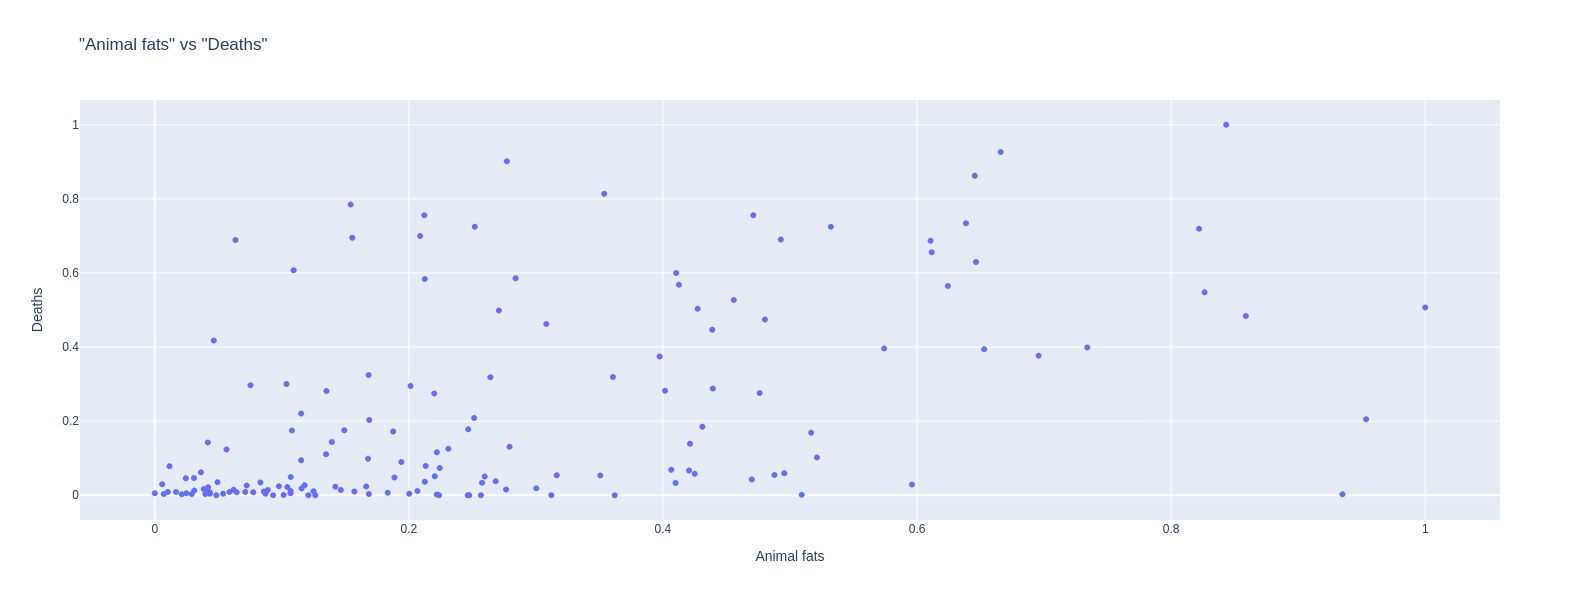

In [57]:
fig = px.scatter(fat_quantity_scaled, x = 'Animal fats', y= 'Deaths', title = '"Animal fats" vs "Deaths"',width=900,height=600)
fig.show()

## K-means and Elbow method

We start with the K-Means model:
- use the scikit-learn method
- use the method you implemented.

Use a graphical tool, the elbow method, to estimate the optimal number of clusters k for a given task.
- Determine the optimal number of clusters for the previous 2 plots.

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmean = KMeans()

In [68]:
def silhouette_plot(X, num_clusters, estimator):
    silhouette_avg = []
    for i in range(2,num_clusters+1):

        estimator.set_params(n_clusters=i)
        estimator.fit(X)


        cluster_labels = estimator.labels_


        silhouette_avg.append(silhouette_score(X, cluster_labels))

    plt.figure(figsize=(8, 5))
    plt.plot(range(2,num_clusters+1), silhouette_avg, marker='o')
    plt.title("Silhouette scores for various numbers of clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.xticks(range(2,num_clusters+1))
    plt.show()
    
def inertia_plot(X, num_clusters, estimator):
    inertia = []
    for i in range(2,num_clusters+1):

        estimator.set_params(n_clusters=i)
        estimator.fit(X)


        # centroids = estimator.centroids
        # labels = estimator.labels_


        inertia.append(estimator.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(2,num_clusters+1), inertia, marker='o')
    plt.title("Inertia for various numbers of clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.xticks(range(2,num_clusters+1))
    plt.show()

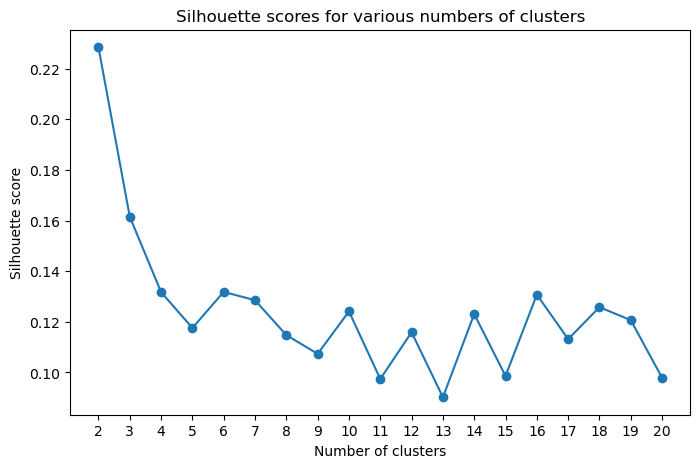

In [71]:
silhouette_plot(fat_quantity_scaled, 20, kmean)

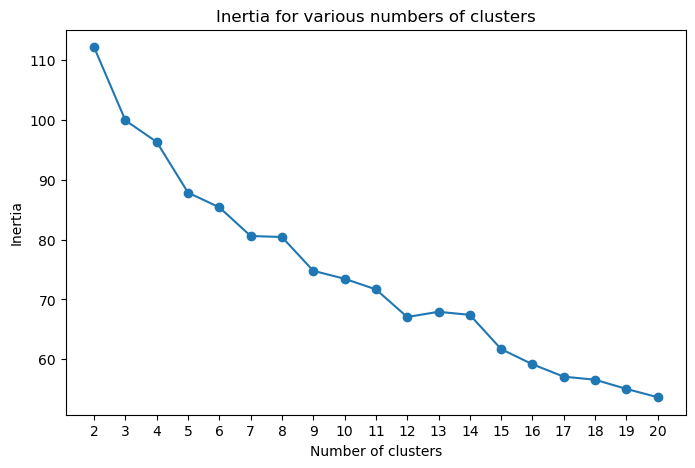

In [70]:
inertia_plot(fat_quantity_scaled, 20, kmean)

Plot the obtained clusters

In [72]:
import seaborn as sns
from sklearn.decomposition import PCA

def plot_clusters(X, labels, centroids):
    # Plot each cluster
    centroids = pd.DataFrame(centroids) 
    pca_result = pd.DataFrame(pca.fit_transform(X),columns = ['pca1','pca2'])
    sns.scatterplot(pca_result, x='pca1',y='pca2',hue=labels,palette='tab10')
    sns.scatterplot(centroids, x=centroids[0],y=centroids[1],c='black')
    
    plt.title('K-Means Clustering')
    plt.xlabel('pca1')
    plt.ylabel('pca2')
    plt.show()

def plot_decision_boundary(kmeans, X, resolution=100):
    X = X.to_numpy()
    # Define bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a grid of points with distance `resolution` between them
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))
    
    # Predict the cluster for each grid point
    grid = np.c_[xx.ravel(), yy.ravel()]
    labels = kmeans.predict(grid)
    labels = labels.reshape(xx.shape)

    plt.contourf(xx, yy, labels, alpha=0.3,cmap='viridis')

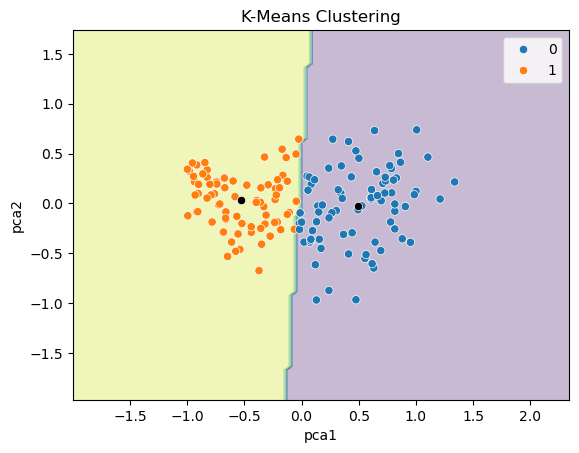

In [90]:
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
fat_quantity_scaled_reduced = pd.DataFrame(pca.fit_transform(fat_quantity_scaled))
kmean = KMeans(n_clusters=2)
kmean.fit(fat_quantity_scaled_reduced)
plot_decision_boundary(kmean, fat_quantity_scaled_reduced, resolution=100)
plot_clusters(fat_quantity_scaled, kmean.labels_, kmean.cluster_centers_)

##### my Kmeans

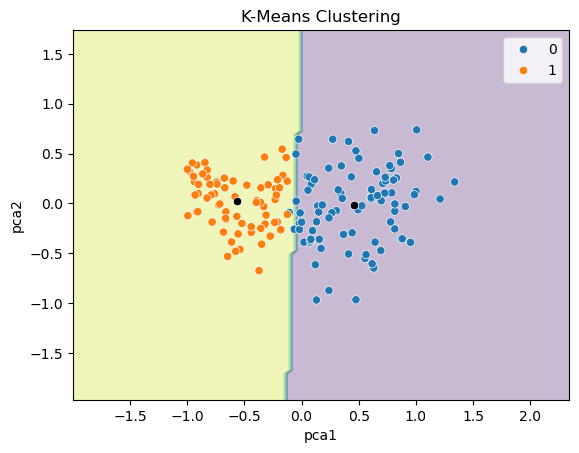

In [91]:
from kMeans import KMeans

myKmean = KMeans(k=2)
labels, centroids = myKmean.fit(fat_quantity_scaled_reduced)

plot_decision_boundary(myKmean, fat_quantity_scaled_reduced, resolution=100)
plot_clusters(fat_quantity_scaled, labels, centroids)

## Other clustering methods

We are going to explore other clustering methods, such as Mean-Shift.

You can read more about it in the next ressource:
https://scikit-learn.org/stable/modules/clustering.html


Apply the method to our datasets made of 2 variables ("Obesity" vs "Deaths")

##### Mean-shift: goal is to move these points toward higher density regions

In [92]:
obesity_deaths = fat_quantity_scaled[["Obesity","Deaths"]]

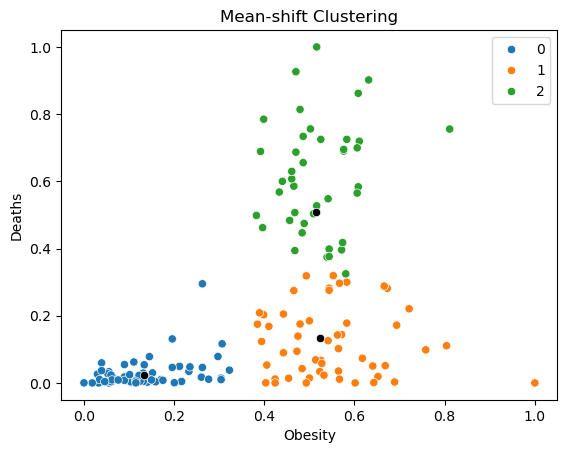

Silhouette: 0.590


In [108]:
# Mean-Shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# small bandwidth can lead to many small clusters
# while a large bandwidth can lead to fewer, larger clusters.
bandwidth = estimate_bandwidth(obesity_deaths, quantile=0.3)
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(obesity_deaths)

# plot_decision_boundary(mean_shift,obesity_deaths,resolution=100)

centroids = pd.DataFrame(mean_shift.cluster_centers_) 
# pca_result = pd.DataFrame(pca.fit_transform(X),columns = ['pca1','pca2'])
sns.scatterplot(obesity_deaths, x='Obesity',y='Deaths',hue=mean_shift.labels_,palette='tab10')
sns.scatterplot(centroids, x=centroids[0],y=centroids[1],c='black')

plt.title('Mean-shift Clustering')
# plt.xlabel('pca1')
# plt.ylabel('pca2')
plt.show()
print(f'Silhouette: {silhouette_score(obesity_deaths,mean_shift.labels_):.3f}')

Check out other algorithms such as DBSAN or OPTICS, why are these algorithms very interesting and in what cases? 

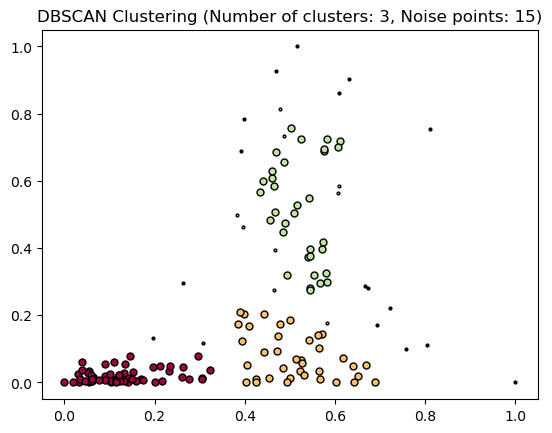

Silhouette: 0.500


In [202]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.077)



dbscan.fit(obesity_deaths)

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black is used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan.labels_ == k)

    X = obesity_deaths.to_numpy()

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=2)

plt.title(f'DBSCAN Clustering (Number of clusters: {n_clusters}, Noise points: {n_noise})')
plt.show()
print(f'Silhouette: {silhouette_score(obesity_deaths,dbscan.labels_):.3f}')

In [225]:
np.arange(0.07,1,0.001)[0]

np.float64(0.07)

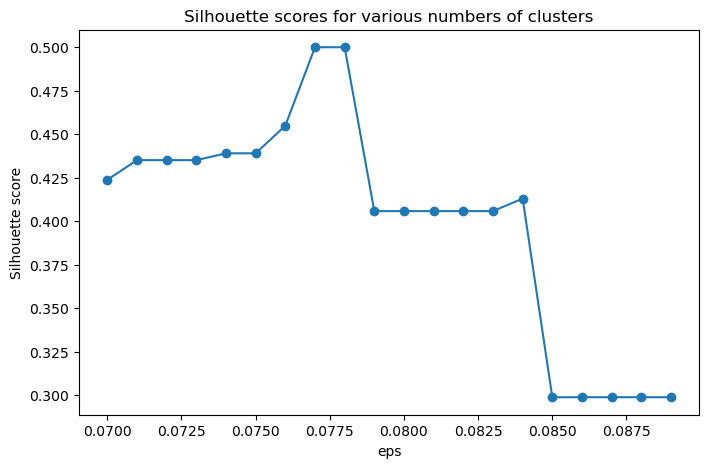

In [231]:
silhouette_avg = []
for i in np.arange(0.07,0.09,0.001):

    dbscan.set_params(eps=i)
    dbscan.fit(obesity_deaths)


    cluster_labels = dbscan.labels_
    # if len(dbscan.labels_) <= 1:


    silhouette_avg.append(silhouette_score(obesity_deaths, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(np.arange(0.07,0.09,0.001), silhouette_avg, marker='o')
plt.title("Silhouette scores for various numbers of clusters")
plt.xlabel("eps")
plt.ylabel("Silhouette score")
# plt.xticks(range(2,len(np.arange(0.07,0.09,0.001))+2))
plt.show()

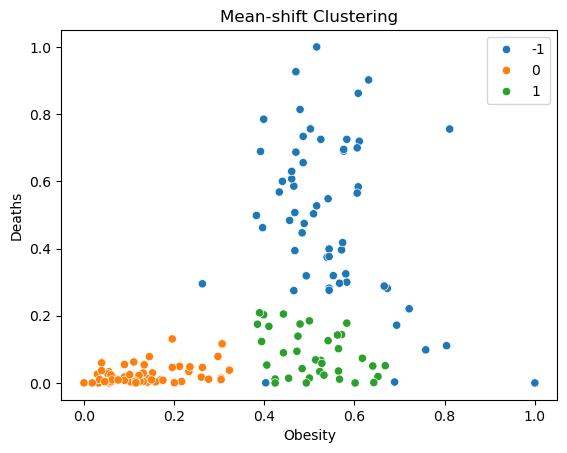

Silhouette: 0.502


In [264]:
from sklearn.cluster import OPTICS

optics_model = OPTICS(min_samples=22)
optics_model.fit(X)
# centroids = pd.DataFrame(optics_model.cluster_centers_) 
# pca_result = pd.DataFrame(pca.fit_transform(X),columns = ['pca1','pca2'])
sns.scatterplot(obesity_deaths, x='Obesity',y='Deaths',hue=optics_model.labels_,palette='tab10')
# sns.scatterplot(centroids, x=centroids[0],y=centroids[1],c='black')

plt.title('Mean-shift Clustering')
# plt.xlabel('pca1')
# plt.ylabel('pca2')
plt.show()
print(f'Silhouette: {silhouette_score(obesity_deaths,optics_model.labels_):.3f}')

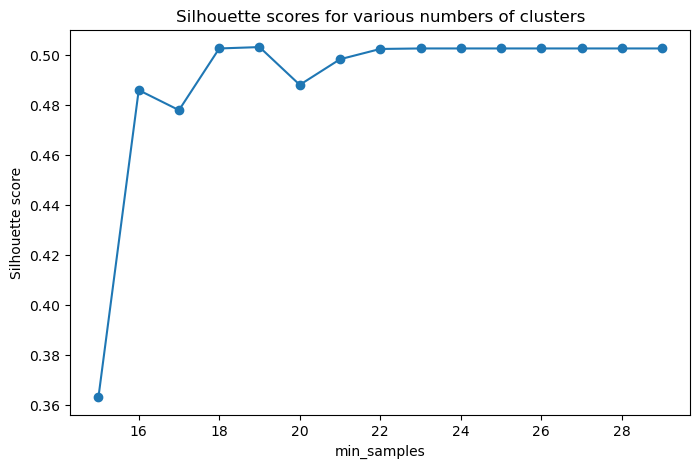

In [265]:
silhouette_avg = []
for i in np.arange(15,30,1):

    optics_model.set_params(min_samples=i)
    optics_model.fit(obesity_deaths)


    cluster_labels = optics_model.labels_
    # if len(dbscan.labels_) <= 1:


    silhouette_avg.append(silhouette_score(obesity_deaths, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(np.arange(15,30,1), silhouette_avg, marker='o')
plt.title("Silhouette scores for various numbers of clusters")
plt.xlabel("min_samples")
plt.ylabel("Silhouette score")
# plt.xticks(range(2,len(np.arange(0.07,0.09,0.001))+2))
plt.show()

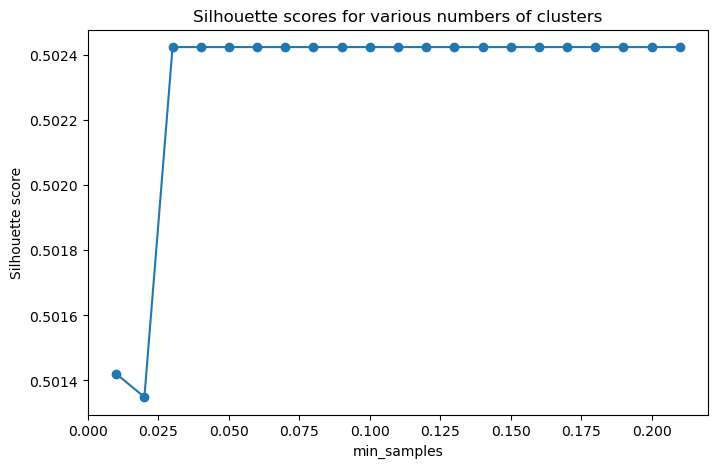

In [272]:
silhouette_avg = []
x_val = []
for i in np.arange(0.01,0.39,0.01):

    optics_model.set_params(xi=i)
    optics_model.fit(obesity_deaths)


    cluster_labels = optics_model.labels_
    if len(set(cluster_labels)) > 1:
        silhouette_avg.append(silhouette_score(obesity_deaths, cluster_labels))
        x_val.append(i)

plt.figure(figsize=(8, 5))
plt.plot(x_val, silhouette_avg, marker='o')
plt.title("Silhouette scores for various numbers of clusters")
plt.xlabel("min_samples")
plt.ylabel("Silhouette score")
# plt.xticks(range(2,len(np.arange(0.07,0.09,0.001))+2))
plt.show()

# Regression and prediction

Given this dataset and the emphasis we have already laid on deaths through clustering, it would be interesting to study this dataset for a classification purpose and see how accurately we can predict the mortality rate in fonction of the given features.

## Creating train and test sets 

Let's separate the data into a training and testing sets using random selection.

In [286]:
def pop_multiple(df, columns):
    popped = {}
    for col in columns:
        popped[col] = df.pop(col)
    return popped

X = fat_quantity.copy()
y = pd.DataFrame(pop_multiple(X, ['Confirmed', 'Deaths', 'Recovered', 'Active']))

In [291]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Scale the datasets.

In [294]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

## Random Forest

Let's try a random forest model on the prepared fat_quantity training set.

In [297]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

reg_Forest = RandomForestRegressor(random_state=42)
reg_Forest.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

Now we predict.

In [305]:
y_pred = reg_Forest.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred, multioutput='raw_values')
global_rmse = root_mean_squared_error(y_test, y_pred)
for i in range(len(rmse)):
    print(f"RMSE for '{y.columns[i]}': {rmse[i]:.2f}")
print('-------------------')
print(f"Global RMSE: {global_rmse:.3f}")

RMSE for 'Confirmed': 1.89
RMSE for 'Deaths': 0.04
RMSE for 'Recovered': 2.02
RMSE for 'Active': 1.28
-------------------
Global RMSE: 1.305


Let's perform a 10 fold cross validation.
And display the resulting scores:

In [486]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

kf = KFold(n_splits=17)
scores = cross_val_score(reg_Forest, X_train_scaled, y_train, cv=kf,scoring='neg_mean_squared_error')

In [484]:
def kf_splits_plot(X,y,max_splits,estimator):
    scores = []
    for split in range(2,max_splits+1):
        kf = KFold(n_splits=split)
        res = cross_val_score(estimator, X, y, cv=kf,scoring='neg_mean_squared_error')
        scores.append(-res.mean())
    plt.plot(range(2,max_splits+1),scores,'o-')
    plt.xticks(range(2,max_splits+1))
    plt.xlabel('n_splits')
    plt.ylabel('MSE')

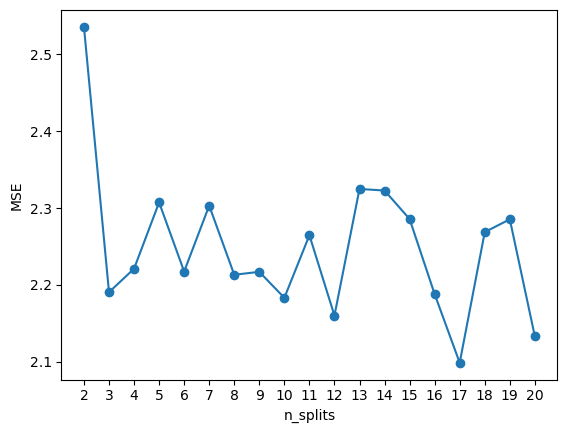

In [485]:
kf_splits_plot(X_train_scaled, y_train,20,reg_Forest)

In [487]:
print(f'Average score: {-scores.mean():.3f}')

Average score: 2.099


## Learning Curves analysis 

Use the function seen in **Module 1 to plot learning curves with cross validation.** 

In [554]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                                                            train_sizes=train_sizes, scoring='neg_root_mean_squared_error',
                                                            shuffle=False)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if axes is None:
        axes = plt.gca()
    
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
        
    axes.set_xlabel("Training examples")
    axes.set_ylabel("MSE")
    
    axes.grid()
    
    # Plot the learning curve
    axes.fill_between(train_sizes, (train_scores_mean - train_scores_std), 
                      (train_scores_mean + train_scores_std), alpha=0.1, color="r")
    axes.fill_between(train_sizes, (test_scores_mean - test_scores_std), 
                      (test_scores_mean + test_scores_std), alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    axes.legend(loc="best")

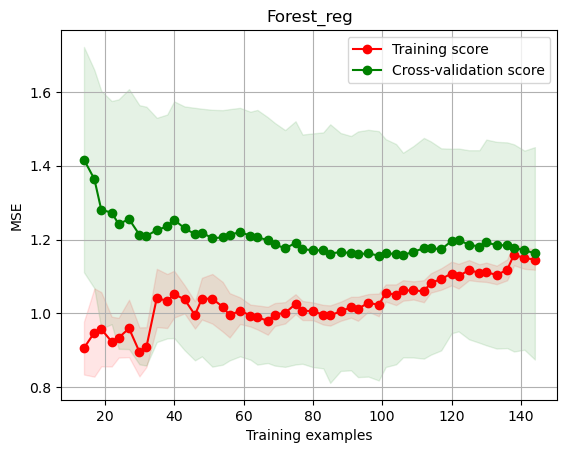

In [556]:
plot_learning_curve(reg_Forest, 'Forest_reg', X, y, axes=None, ylim=None, cv=kf, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 50))

Try to interpret the obtained learning curve.

Perform a grid search to try to obtain the best hyperparameters. What is the best score that you obtained?

In [429]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators': [3,5,10,50,100],
    'max_depth': [None,2,5,10],
    'max_features': [0.1,0.2,0.5,0.8],
    'min_samples_split': [2,3,5,10],
    'min_samples_leaf': [2,3,5,10]
}

grid_search = GridSearchCV(
    reg_Forest,
    param_grid=grid_param,
    cv=kf,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

In [430]:
from sklearn.metrics import classification_report

grid_search.fit(X_train_scaled,y_train)
grid_search.best_estimator_.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=5, max_features=0.2, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=50, random_state=42)

In [431]:
from sklearn.metrics import accuracy_score

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = np.mean(test_labels / errors)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_scaled, y_test)

Model Performance
Average Error: 0.7928 degrees.
Accuracy = 93.92%.


In [432]:
results = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_train_score',ascending=False)[['params','mean_train_score']]
results['params'] = results['params'].map(lambda x: str(x))
results['mean_train_score'] = -results['mean_train_score']

In [379]:
# f, ax = plt.subplots(figsize=(6, 15))
# sns.barplot(results,
#             x='mean_train_score',
#             y='params',
#             palette=[
#             '#FA0FAC' if params == "{'max_depth': 5, 'max_features': 0.2, 'n_estimators': 50}" else '#AA8894' 
#             for params in results['params']
#             ]
#            )
# plt.tick_params(left = False)
# sns.despine(left=True, bottom=True)

In [557]:
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
y_pred_train = grid_search.best_estimator_.predict(X_train_scaled)
print(f'RMSE train: {root_mean_squared_error(y_pred_train,y_train):.3f}')
print(f'RMSE test: {root_mean_squared_error(y_pred,y_test):.3f}')

RMSE train: 0.777
RMSE test: 1.260


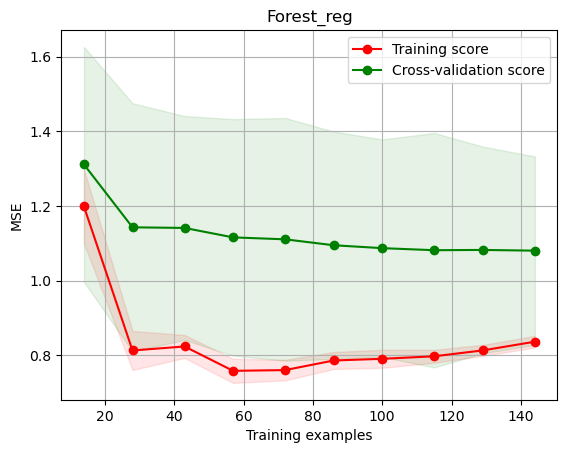

In [558]:
plot_learning_curve(grid_search.best_estimator_, 'Forest_reg', X, y, axes=None, ylim=None, cv=kf, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10))

In [553]:
reg_Forest.set_params(
    max_depth = 2,
    max_features = 0.1,
    n_estimators = 3,
    random_state = 42
)
reg_Forest.fit(X_train_scaled,y_train)
y_pred = reg_Forest.predict(X_test_scaled)
y_pred_train = reg_Forest.predict(X_train_scaled)
print(f'RMSE train: {root_mean_squared_error(y_pred_train,y_train):.3f}')
print(f'RMSE test: {root_mean_squared_error(y_pred,y_test):.3f}')

RMSE train: 1.129
RMSE test: 1.232


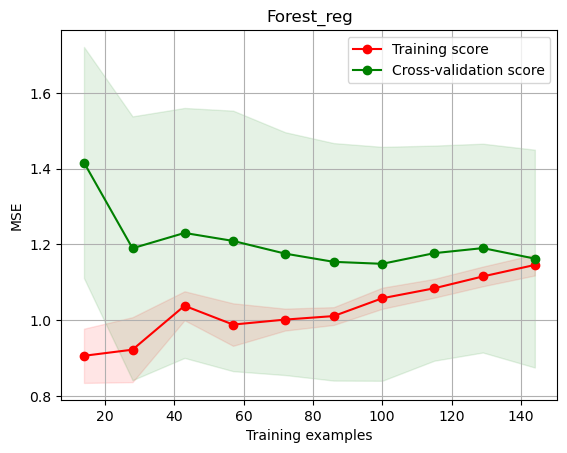

In [555]:
plot_learning_curve(reg_Forest, 'Forest_reg', X, y, axes=None, ylim=None, cv=kf, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10))

## SVM

Use the SVM regressor to estimate the death rate. See if you can get a better model than with the Random forest regressor.

## Linear regression

# Dimensionality reduction

Let's take a look at the whole dataset and see if there are any clusters.

In order to do these perform and plot a PCA of 2 components.

Dimensionality reduction is a way to reduce the number of features in your dataset without having to lose much information and keep the model’s performance. Check out the Random Forest based method and PCA for dimensionality reduction in the following ressource:

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

## Random Forest feature selection

Plot the feature importance graph.

Comment the graph.

## PCA dimensionality reduction

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. Apply clustering methods on this new set of variables. Are the clusters obtained different than the clusters obtained on the "Obesity" vs "Deaths"?

Apply the Elbow method to determne the right number of clusters.

Use diverse methods to cluster the countries.